In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from feature_engine.discretisation import GeometricWidthDiscretiser

In [2]:
data = pd.read_csv('../data/housing.csv')   # ~ rename from train.csv
# data.head()

# # let's separate into training and testing set
# X = data.drop(["Id", "SalePrice"], axis=1)
# y = data.SalePrice

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# print("X_train :", X_train.shape)   # (1022, 79)
# print("X_test :", X_test.shape)     # (438, 79)

In [3]:
# Read the separate files
train_df = pd.read_csv('../data/house-prices/train.csv')
test_df = pd.read_csv('../data/house-prices/test.csv')

# Separate features and target in training data
X_train = train_df.drop(['Id', 'SalePrice'], axis=1)
y_train = train_df['SalePrice']

# For test data, you might not have the target variable
X_test = test_df.drop(['Id'], axis=1)  # Note: test data might not have SalePrice column

print("X_train :", X_train.shape)
print("X_test :", X_test.shape)

X_train : (1460, 79)
X_test : (1459, 79)


In [4]:
# set up the discretisation transformer
disc = GeometricWidthDiscretiser(bins=10, variables=['LotArea', 'GrLivArea'])

# fit the transformer
disc.fit(X_train)

GeometricWidthDiscretiser(variables=['LotArea', 'GrLivArea'])

In [5]:
# transform the data
train_t= disc.transform(X_train)
test_t= disc.transform(X_test)

In [6]:
disc.binner_dict_

{'LotArea': [-inf,
  1303.4121664944212,
  1311.64288018565,
  1339.7274456680343,
  1435.556659017401,
  1762.5418899948415,
  2878.2699393066086,
  6685.319806054034,
  19675.607803959916,
  64000.63326329492,
  inf],
 'GrLivArea': [-inf,
  336.35772468993326,
  339.55886571352096,
  347.106274940792,
  364.9009880209592,
  406.8560224003479,
  505.77444282363246,
  738.9968449448108,
  1288.871060671461,
  2585.323075447883,
  inf]}

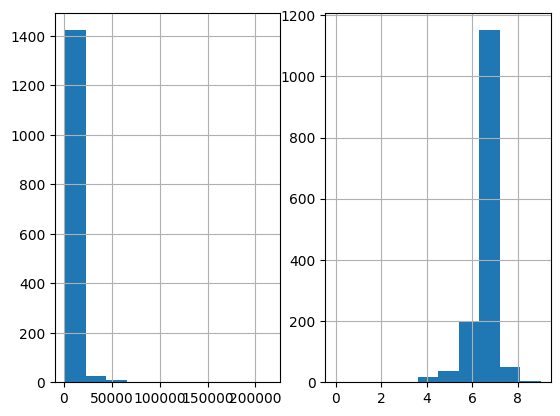

In [7]:
fig, ax = plt.subplots(1, 2)
X_train['LotArea'].hist(ax=ax[0], bins=10);
train_t['LotArea'].hist(ax=ax[1], bins=10);